In [1]:
import os
os.getcwd()

In [2]:
os.chdir("C:/Users/siddh/OneDrive/Desktop/Data sets")

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [4]:
df1=pd.read_csv("winequality-red.csv",delimiter=';')

In [5]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


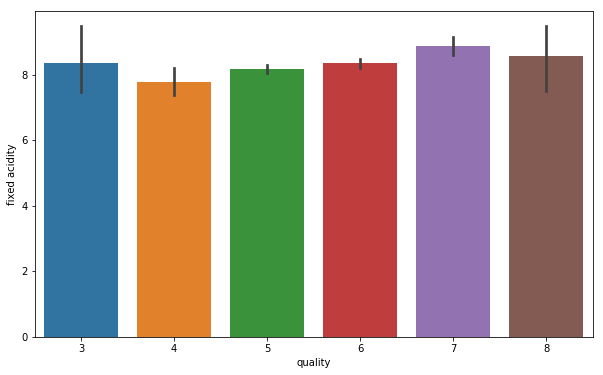

In [7]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df1)


#  fixed acidity does not give any specification to classify the quality.

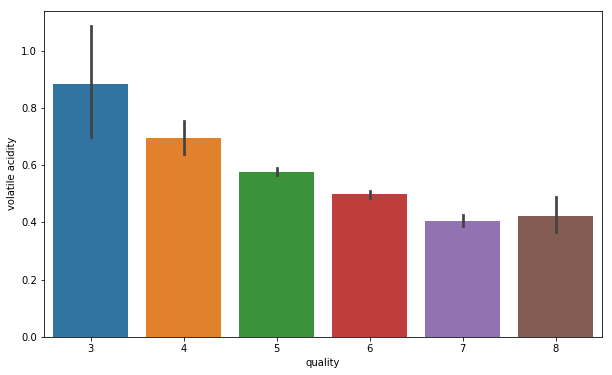

In [8]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df1)

# volatile acidity decreases with increase in quality

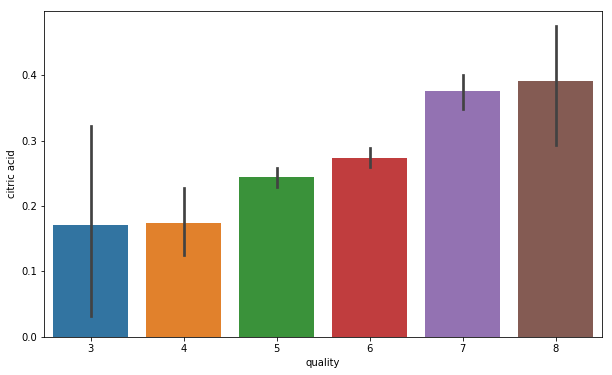

In [9]:

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df1)

# Composition of citric acid go higher as we go higher in the quality of the wine#   

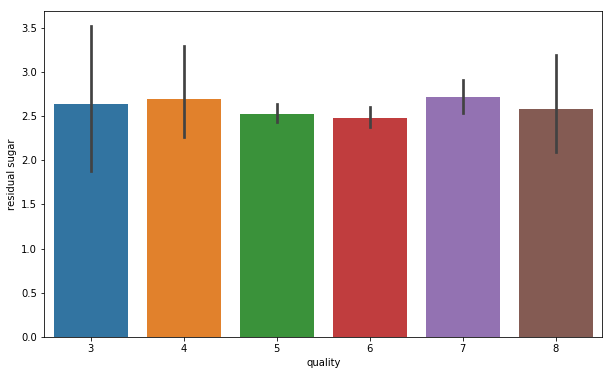

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df1)

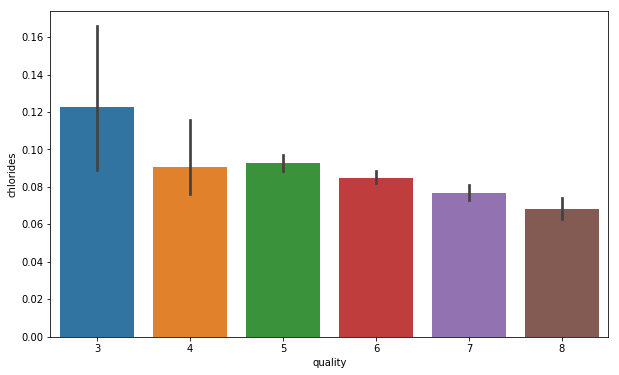

In [11]:

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df1)

# Composition of chloride also go down as we go higher in the quality of the wine

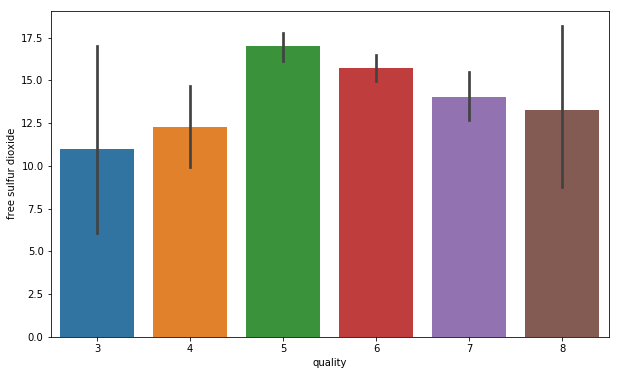

In [12]:

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df1)

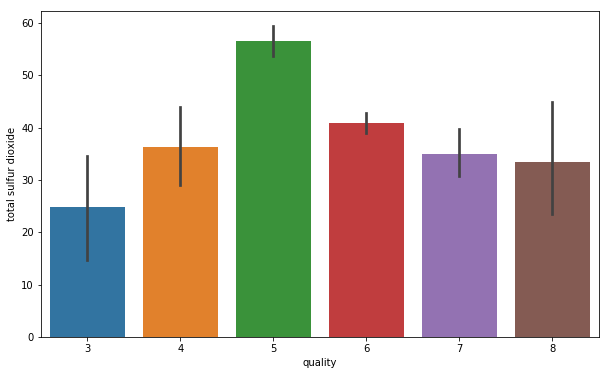

In [13]:

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df1)

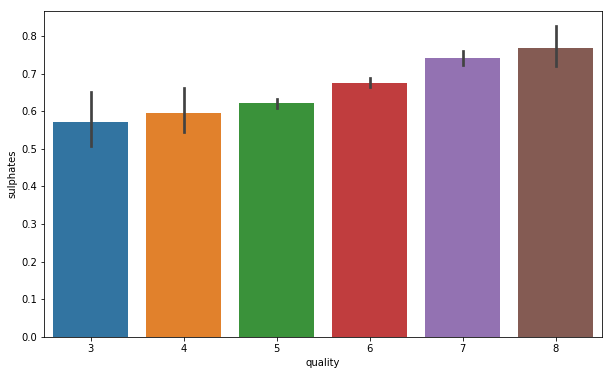

In [14]:

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df1)

# Sulphates level goes higher with the quality of wine

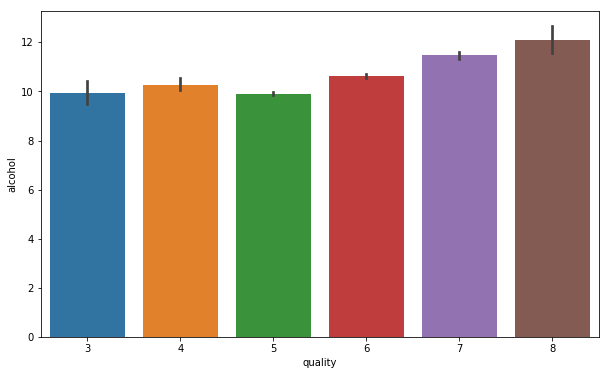

In [15]:

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df1)

# Alcohol level also goes higher as the quality of wine increases

In [18]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df1['quality'] = pd.cut(df1['quality'], bins = bins, labels = group_names)

In [19]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [22]:
#Bad becomes 0 and good becomes 1 
df1['quality'] = label_quality.fit_transform(df1['quality'])

In [33]:
df1['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

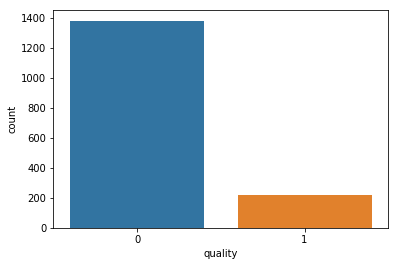

In [35]:
sns.countplot(df1['quality'])

In [23]:
X = df1.drop('quality', axis = 1)
y = df1['quality']

In [53]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [54]:
sc = StandardScaler()

In [55]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# training and testing data is ready now to perform machine learning algorithm

#  Random Forest Classifier

In [56]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [57]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       273
           1       0.74      0.36      0.49        47

   micro avg       0.89      0.89      0.89       320
   macro avg       0.82      0.67      0.71       320
weighted avg       0.88      0.89      0.87       320



In [58]:
print(confusion_matrix(y_test, pred_rfc))

[[267   6]
 [ 30  17]]


 # Support Vector Classifier

In [59]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [60]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

   micro avg       0.88      0.88      0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [62]:
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 9)
rfc_eval.mean()

0.9148358716833395